In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

plt.rc('font' ,family='Microsoft JhengHei')
plt.rcParams['axes.unicode_minus'] = False

In [111]:
# 出站資料
df_cluster = pd.read_csv('TAIPEI_MRT_output.csv')
df_cluster

,station,0_0,0_1,0_5,0_6,0_7,0_8,0_9,0_10,0_11,...,6_14,6_15,6_16,6_17,6_18,6_19,6_20,6_21,6_22,6_23
0,松山機場,0.0,0.0,0.0,0.8,1.5,2.2,1.5,1.3,1.2,...,1.6,1.8,1.6,1.3,0.7,0.5,0.5,0.4,0.3,0.1
1,中山國中,0.2,0.0,0.0,0.5,2.6,7.6,4.1,1.8,1.6,...,2.2,2.4,2.6,3.5,2.9,2.3,2.1,2.3,1.7,0.6
2,南京復興,0.3,0.0,0.0,2.2,11.2,36.8,16.1,7.2,6.8,...,7.2,6.3,7.7,9.4,7.4,5.3,4.2,4.0,3.5,1.2
3,忠孝復興,0.3,0.0,0.0,1.7,6.0,12.5,9.8,10.2,10.5,...,15.0,14.4,14.5,15.2,11.9,8.4,5.7,4.6,2.8,1.2
4,大安,0.3,0.0,0.0,1.3,9.4,16.1,7.4,4.3,4.0,...,4.9,4.2,4.1,4.7,4.2,3.0,2.7,2.8,1.9,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,徐匯中學,0.4,0.0,0.0,0.3,1.0,0.9,0.8,0.8,1.0,...,2.2,2.6,3.5,4.0,3.9,3.6,3.7,3.3,3.1,1.6
104,三和國中,0.5,0.0,0.0,0.3,1.1,1.2,1.0,0.8,0.9,...,2.0,2.7,3.1,3.6,3.8,3.5,3.3,3.3,3.5,1.4
105,三重國小,0.5,0.0,0.0,0.3,0.8,1.0,0.9,1.0,1.2,...,2.4,2.5,3.0,3.8,3.9,3.3,3.3,3.8,3.2,1.5
106,迴龍,0.4,0.0,0.0,0.5,2.0,1.5,1.2,0.9,1.0,...,1.6,2.1,2.5,2.8,2.8,2.8,2.7,2.7,2.6,1.5


In [112]:
# 檢查每一天包含的時段數
for day in range(7):
    day_columns = [col for col in df_cluster.columns if col.startswith(f'{day}_')]
    print(f"星期 {day} 有 {len(day_columns)} 個時段欄位： {day_columns}")

星期 0 有 21 個時段欄位： ['0_0', '0_1', '0_5', '0_6', '0_7', '0_8', '0_9', '0_10', '0_11', '0_12', '0_13', '0_14', '0_15', '0_16', '0_17', '0_18', '0_19', '0_20', '0_21', '0_22', '0_23']
星期 1 有 21 個時段欄位： ['1_0', '1_1', '1_5', '1_6', '1_7', '1_8', '1_9', '1_10', '1_11', '1_12', '1_13', '1_14', '1_15', '1_16', '1_17', '1_18', '1_19', '1_20', '1_21', '1_22', '1_23']
星期 2 有 21 個時段欄位： ['2_0', '2_1', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_14', '2_15', '2_16', '2_17', '2_18', '2_19', '2_20', '2_21', '2_22', '2_23']
星期 3 有 21 個時段欄位： ['3_0', '3_1', '3_5', '3_6', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '3_16', '3_17', '3_18', '3_19', '3_20', '3_21', '3_22', '3_23']
星期 4 有 21 個時段欄位： ['4_0', '4_1', '4_5', '4_6', '4_7', '4_8', '4_9', '4_10', '4_11', '4_12', '4_13', '4_14', '4_15', '4_16', '4_17', '4_18', '4_19', '4_20', '4_21', '4_22', '4_23']
星期 5 有 21 個時段欄位： ['5_0', '5_1', '5_5', '5_6', '5_7', '5_8', '5_9', '5_10', '5_11', '5_12', '5_13', '5_14'

In [113]:
df_station = pd.read_csv('station_name.csv')
df_station

,ID,CH_1,EN_1
0,BR24,南港展覽館,Taipei Nangang Exhibition Center
1,BR23,南港軟體園區,Nangang Software Park
2,BR22,東湖,Donghu
3,BR21,葫洲,Huzhou
4,BR20,大湖公園,Dahu Park
...,...,...,...
117,BL05,亞東醫院,Far Eastern Hospital
118,BL04,海山,Haishan
119,BL03,土城,Tucheng
120,BL02,永寧,Yongning


In [114]:
#　檢查是否有存在不一樣的站名
station_names_cluster = df_cluster['station'].unique()
station_names_station = df_station['CH_1'].unique()

mismatched_names = set(station_names_cluster) - set(station_names_station)
print("不一樣的站名：", mismatched_names)

不一樣的站名： set()


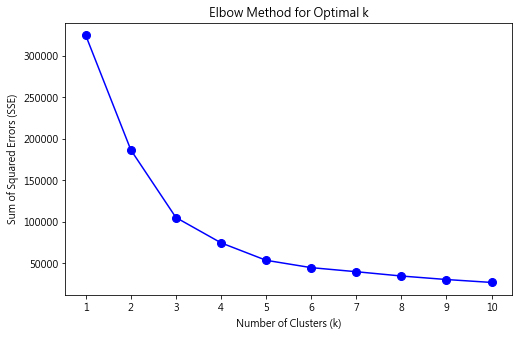

In [115]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster.drop(columns=['station']))
    sse.append(kmeans.inertia_)

# 繪製肘部圖
plt.figure(figsize=(8, 5))
plt.plot(K, sse, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.show()

In [116]:
from sklearn.cluster import KMeans

def k_means_df(df, num_clusters):
    # 去除非數值欄位
    df_numeric = df.drop(columns=['station'])
    # KMeans 分群
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_numeric)
    # 新增分群欄位
    df['cluster'] = kmeans.labels_
    return df

def k_means_list(km_df):
    group_dict = {}
    for station in km_df.index:
        # 取得站名與分群
        station_group = km_df.loc[station, 'cluster']
        # 移除非數值欄位並轉換為列表
        old_list = km_df.loc[station].drop(labels=['station', 'cluster']).tolist()
        # 每21小時一組重新整理
        new_list = []
        week_list = []
        for number in old_list:            
            if len(week_list) < 21:
                week_list.append(number)
            else:
                new_list.append(week_list)
                week_list = [number]
        new_list.append(week_list)

        # 組成資料框
        result_df = pd.DataFrame(new_list, columns=[0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                                 index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
        station_dict = {km_df.loc[station, 'station']: result_df}
        group_dict.setdefault(station_group, []).append(station_dict)
        
    return group_dict

# 使用函数进行分群並整理
k = 6
df_cluster_grouped = k_means_df(df_cluster, num_clusters=k)
grouped_data = k_means_list(df_cluster_grouped)
grouped_data[0]

[{'G大坪林':       0    1    5    6    7     8    9    10   11   12  ...   14   15   16  \
  Mon  0.5  0.0  0.0  1.0  4.9   8.3  5.2  2.7  2.8  2.8  ...  2.7  3.2  4.1   
  Tue  0.5  0.0  0.0  1.2  6.1  10.7  6.6  3.2  2.8  3.0  ...  2.8  3.2  4.4   
  Wed  0.5  0.0  0.0  1.2  6.4  10.5  6.8  3.0  2.8  3.4  ...  2.9  3.2  4.4   
  Thu  0.6  0.0  0.0  1.2  6.5  10.5  6.8  3.1  2.8  3.1  ...  2.9  3.3  4.4   
  Fri  0.9  0.0  0.0  1.1  6.1  10.2  6.3  3.2  3.1  3.5  ...  3.1  3.4  4.4   
  Sat  1.0  0.1  0.0  0.7  2.2   3.5  3.4  3.7  4.5  4.7  ...  4.6  4.9  5.0   
  Sun  0.7  0.1  0.0  0.7  1.5   2.3  2.4  2.7  4.0  4.2  ...  4.0  4.3  4.6   
  
        17    18   19   20   21   22   23  
  Mon  6.1   9.2  6.3  3.7  3.7  2.9  1.2  
  Tue  7.0  10.8  7.4  4.2  3.9  3.3  1.2  
  Wed  7.5  10.7  7.7  4.3  4.2  3.5  1.4  
  Thu  7.2  10.8  7.7  4.3  4.3  3.7  1.4  
  Fri  7.6  10.9  7.4  4.4  4.6  4.5  2.0  
  Sat  6.4   6.4  4.9  4.2  5.0  4.2  2.2  
  Sun  5.7   5.2  4.5  4.0  4.2  3.2  1.5

In [117]:
cluster_counts = df_cluster_grouped.groupby('cluster')['station'].apply(list).reset_index()
cluster_counts['station_count'] = cluster_counts['station'].apply(len)

for index, row in cluster_counts.iterrows():
    print(f"There are {row['station_count']} stations belonging to cluster {row['cluster']}:")
    print(", ".join(row['station']))
    print("\n")

There are 21 stations belonging to cluster 0:
G大坪林, 公館, 頂溪, 永安市場, O景安, 南勢角, 圓山, 劍潭, 士林, 芝山, 石牌, 淡水, 海山, 亞東醫院, 府中, 新埔, 江子翠, 龍山寺, 永春, 南港, 松山


There are 1 stations belonging to cluster 1:
台北車站


There are 19 stations belonging to cluster 2:
大安, 西湖, 港墘, 南港展覽館, 古亭, 中正紀念堂, 台大醫院, 雙連, 民權西路, 善導寺, 忠孝新生, 忠孝敦化, 國父紀念館, 台北101/世貿, 信義安和, 台北小巨蛋, 南京三民, 行天宮, 東門


There are 60 stations belonging to cluster 3:
松山機場, 中山國中, 科技大樓, 六張犁, 麟光, 辛亥, 萬芳醫院, 萬芳社區, 木柵, 動物園, 大直, 劍南路, 文德, 內湖, 大湖公園, 葫洲, 東湖, 南港軟體園區, 小碧潭, 新店, 新店區公所, 七張, 景美, 萬隆, 台電大樓, 小南門, 明德, 唭哩岸, 奇岩, 北投, 新北投, 復興崗, 忠義, 關渡, 竹圍, 紅樹林, 頂埔, 永寧, 土城, 後山埤, 昆陽, 象山, 大安森林公園, 北門, 輔大, 新莊, O頭前庄, 先嗇宮, 三重, 菜寮, 台北橋, 大橋頭站, 中山國小, 蘆洲, 三民高中, 徐匯中學, 三和國中, 三重國小, 迴龍, 丹鳳


There are 3 stations belonging to cluster 4:
南京復興, 市政府, 松江南京


There are 4 stations belonging to cluster 5:
忠孝復興, 中山, BL板橋, 西門




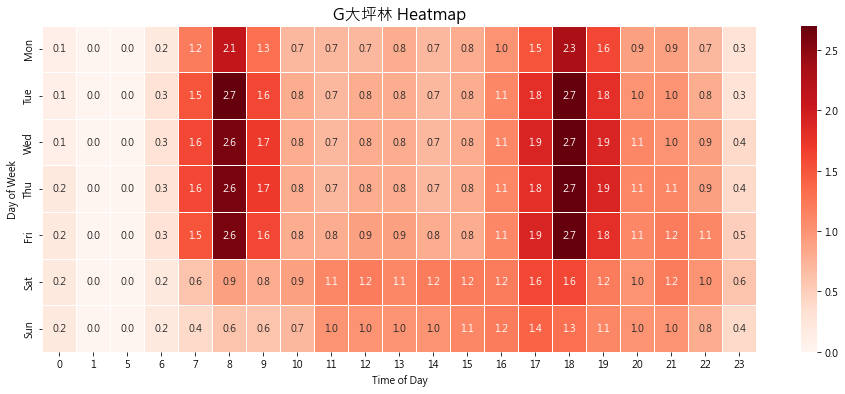

In [118]:
# 從grouped_data[0]中提取第一個分群的第一個站點的資料
station_data = grouped_data[0][0]

# 获取站点名称
station_name = list(station_data.keys())[0]  # 站點名稱
data = station_data[station_name]  # 站點資料
data = data / 4
data = data.round(1)  

# 繪製熱力圖
plt.figure(figsize=(16, 6))
sns.heatmap(data, annot=True, cmap="Reds", cbar=True, linewidths=.5, fmt='.1f')
plt.title(f'{station_name} Heatmap', fontsize=16)
plt.xlabel('Time of Day')
plt.ylabel('Day of Week')
plt.show()

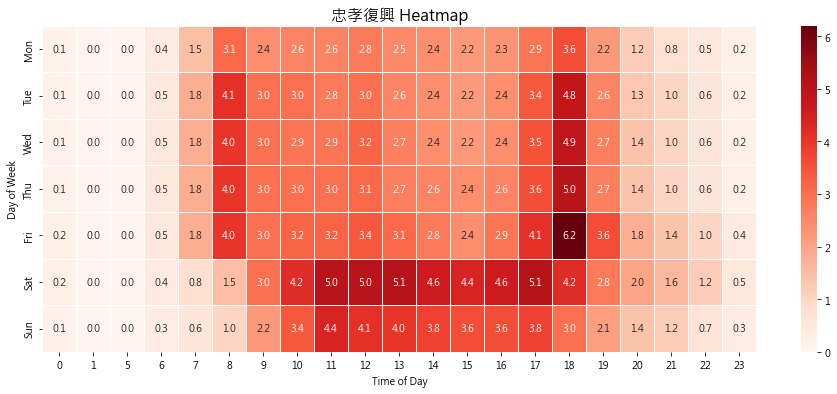

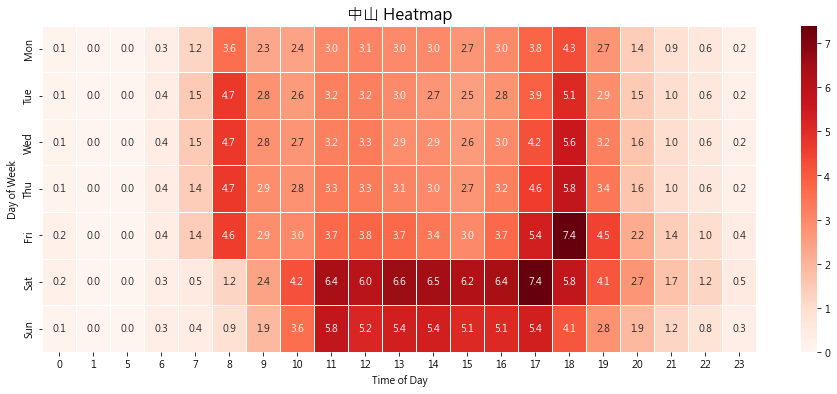

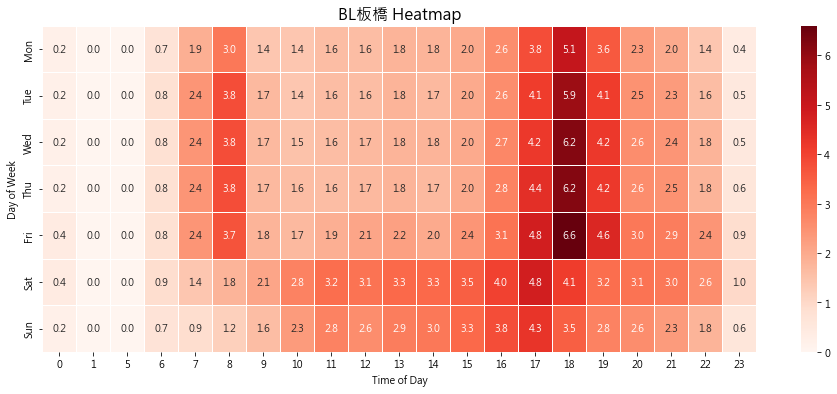

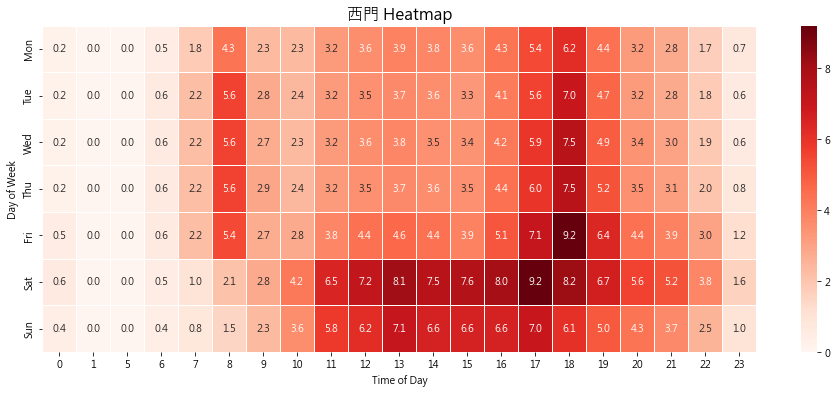

In [127]:
#　繪製分群的所有站點的熱力圖
station_data_list = grouped_data[5]  

for station_data in station_data_list:
    station_name = list(station_data.keys())[0]
    data = station_data[station_name]  
    data = data / 4
    data = data.round(1)  

    plt.figure(figsize=(16, 6))
    sns.heatmap(data, annot=True, cmap="Reds", cbar=True, linewidths=.5, fmt='.1f')
    plt.title(f'{station_name} Heatmap', fontsize=16)
    plt.xlabel('Time of Day')
    plt.ylabel('Day of Week')
    plt.show()

In [120]:
df_cluster_grouped

,station,0_0,0_1,0_5,0_6,0_7,0_8,0_9,0_10,0_11,...,6_15,6_16,6_17,6_18,6_19,6_20,6_21,6_22,6_23,cluster
0,松山機場,0.0,0.0,0.0,0.8,1.5,2.2,1.5,1.3,1.2,...,1.8,1.6,1.3,0.7,0.5,0.5,0.4,0.3,0.1,3
1,中山國中,0.2,0.0,0.0,0.5,2.6,7.6,4.1,1.8,1.6,...,2.4,2.6,3.5,2.9,2.3,2.1,2.3,1.7,0.6,3
2,南京復興,0.3,0.0,0.0,2.2,11.2,36.8,16.1,7.2,6.8,...,6.3,7.7,9.4,7.4,5.3,4.2,4.0,3.5,1.2,4
3,忠孝復興,0.3,0.0,0.0,1.7,6.0,12.5,9.8,10.2,10.5,...,14.4,14.5,15.2,11.9,8.4,5.7,4.6,2.8,1.2,5
4,大安,0.3,0.0,0.0,1.3,9.4,16.1,7.4,4.3,4.0,...,4.2,4.1,4.7,4.2,3.0,2.7,2.8,1.9,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,徐匯中學,0.4,0.0,0.0,0.3,1.0,0.9,0.8,0.8,1.0,...,2.6,3.5,4.0,3.9,3.6,3.7,3.3,3.1,1.6,3
104,三和國中,0.5,0.0,0.0,0.3,1.1,1.2,1.0,0.8,0.9,...,2.7,3.1,3.6,3.8,3.5,3.3,3.3,3.5,1.4,3
105,三重國小,0.5,0.0,0.0,0.3,0.8,1.0,0.9,1.0,1.2,...,2.5,3.0,3.8,3.9,3.3,3.3,3.8,3.2,1.5,3
106,迴龍,0.4,0.0,0.0,0.5,2.0,1.5,1.2,0.9,1.0,...,2.1,2.5,2.8,2.8,2.8,2.7,2.7,2.6,1.5,3


In [121]:
#　填補空缺的 2-4 時段
group_ids = range(7)
for group_id in group_ids:
    for suffix in range(2, 5):  # 從 _2 到 _4
        column_name = f"{group_id}_1"
        new_column_name = f"{group_id}_{suffix}"
        insert_position = df_cluster_grouped.columns.get_loc(column_name) + suffix - 1
        df_cluster_grouped.insert(insert_position, new_column_name, 0)

In [122]:
df_cluster_grouped_re = df_cluster_grouped
df_cluster_grouped_re.set_index('station', inplace=True)
df_cluster_grouped_re

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,6_15,6_16,6_17,6_18,6_19,6_20,6_21,6_22,6_23,cluster
station,,,,,,,,,,,,,,,,,,,,,
松山機場,0.0,0.0,0,0,0,0.0,0.8,1.5,2.2,1.5,...,1.8,1.6,1.3,0.7,0.5,0.5,0.4,0.3,0.1,3
中山國中,0.2,0.0,0,0,0,0.0,0.5,2.6,7.6,4.1,...,2.4,2.6,3.5,2.9,2.3,2.1,2.3,1.7,0.6,3
南京復興,0.3,0.0,0,0,0,0.0,2.2,11.2,36.8,16.1,...,6.3,7.7,9.4,7.4,5.3,4.2,4.0,3.5,1.2,4
忠孝復興,0.3,0.0,0,0,0,0.0,1.7,6.0,12.5,9.8,...,14.4,14.5,15.2,11.9,8.4,5.7,4.6,2.8,1.2,5
大安,0.3,0.0,0,0,0,0.0,1.3,9.4,16.1,7.4,...,4.2,4.1,4.7,4.2,3.0,2.7,2.8,1.9,0.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
徐匯中學,0.4,0.0,0,0,0,0.0,0.3,1.0,0.9,0.8,...,2.6,3.5,4.0,3.9,3.6,3.7,3.3,3.1,1.6,3
三和國中,0.5,0.0,0,0,0,0.0,0.3,1.1,1.2,1.0,...,2.7,3.1,3.6,3.8,3.5,3.3,3.3,3.5,1.4,3
三重國小,0.5,0.0,0,0,0,0.0,0.3,0.8,1.0,0.9,...,2.5,3.0,3.8,3.9,3.3,3.3,3.8,3.2,1.5,3


In [123]:
def line_graph_xlabel():
    return list(range(168))  #  x 軸標籤列表（0~167），對應一周 168(24x7) 小時

# 計算每個cluster內數據列的平均值
def cluster_mean_dict(df):
    result_dict = {}
    for cluster in df['cluster'].unique():
        result_dict[cluster] = df[df['cluster'] == cluster].iloc[:, :-1].mean()
    return result_dict

# Key: cluster, Value: DataFrame
def cluster_group_dict_list_format(df):
    group_dict = {}
    for station in df.index:
        station_group = df.loc[station, 'cluster']
        station_dict = {station: df.loc[station][:-1]}  # 只保留數據列
        group_dict.setdefault(station_group, []).append(station_dict)
    return group_dict

#　繪製cluster的折線圖
def line_graph(group_dict, cluster_mean_dict, mean_color):
    x_labels = line_graph_xlabel()
    
    # 計算圖表行數
    heigh = (len(group_dict) + 1) // 2

    fig, ax = plt.subplots(heigh, 2, figsize=(16 * 2, 5 * heigh))
    fig.subplots_adjust(hspace=0.2)

    for cluster in group_dict:
        # 設置子圖位置
        location_c = cluster % 2
        location_r = cluster // 2
        
        ax[location_r, location_c].set_title(f'Cluster: {cluster}', y=1.03)

        # 繪製每個車站的數據
        for station_dict in group_dict[cluster]:
            for station, values in station_dict.items():
                # 確保 values 的長度與 x_labels 一致
                if len(values) == len(x_labels):
                    ax[location_r, location_c].plot(x_labels, values, color='#d9d9d9', label='_nolegend_')
                else:
                    # 如果長度不一致，則處理方式可以是打印警告，或是填充至168
                    print(f"Skipping {station} due to length mismatch: {len(values)} vs {len(x_labels)}")
                    
        # 繪製聚類平均值
        if cluster in cluster_mean_dict:
            ax[location_r, location_c].plot(x_labels, cluster_mean_dict[cluster], color=mean_color, label='Cluster avg.')

        # 添加垂直線
        weekday = ['Mon Noon', 'Tue Noon', 'Wed Noon', 'Thu Noon', 'Fri Noon', 'Sat Noon', 'Sun Noon']
        for i in range(0, 168, 24):
            ax[location_r, location_c].axvline(x=i, color='k', linestyle='--', linewidth=1.2)
            ax[location_r, location_c].text(i + 8, 0, weekday[i // 24], color=(0.3, 0.3, 0.3))

        # 最右側的垂直線
        ax[location_r, location_c].axvline(x=167, color='k', linestyle='--', linewidth=1)

        # 為每隔 12 小時添加淺色垂直線
        for i in range(12, 168, 24):
            ax[location_r, location_c].axvline(x=i, color=(0.45, 0.45, 0.45), linestyle='--', linewidth=1)

        # 關閉 x 軸標籤
        ax[location_r, location_c].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax[location_r, location_c].legend()
    plt.show()

In [124]:
line_group_dict = cluster_group_dict_list_format(df_cluster_grouped_re)
line_group_dict[1][0]

{'台北車站': 0_0      0.5
 0_1      0.0
 0_2      0.0
 0_3      0.0
 0_4      0.0
         ... 
 6_19    39.7
 6_20    35.8
 6_21    30.1
 6_22    17.6
 6_23     5.0
 Name: 台北車站, Length: 168, dtype: float64}

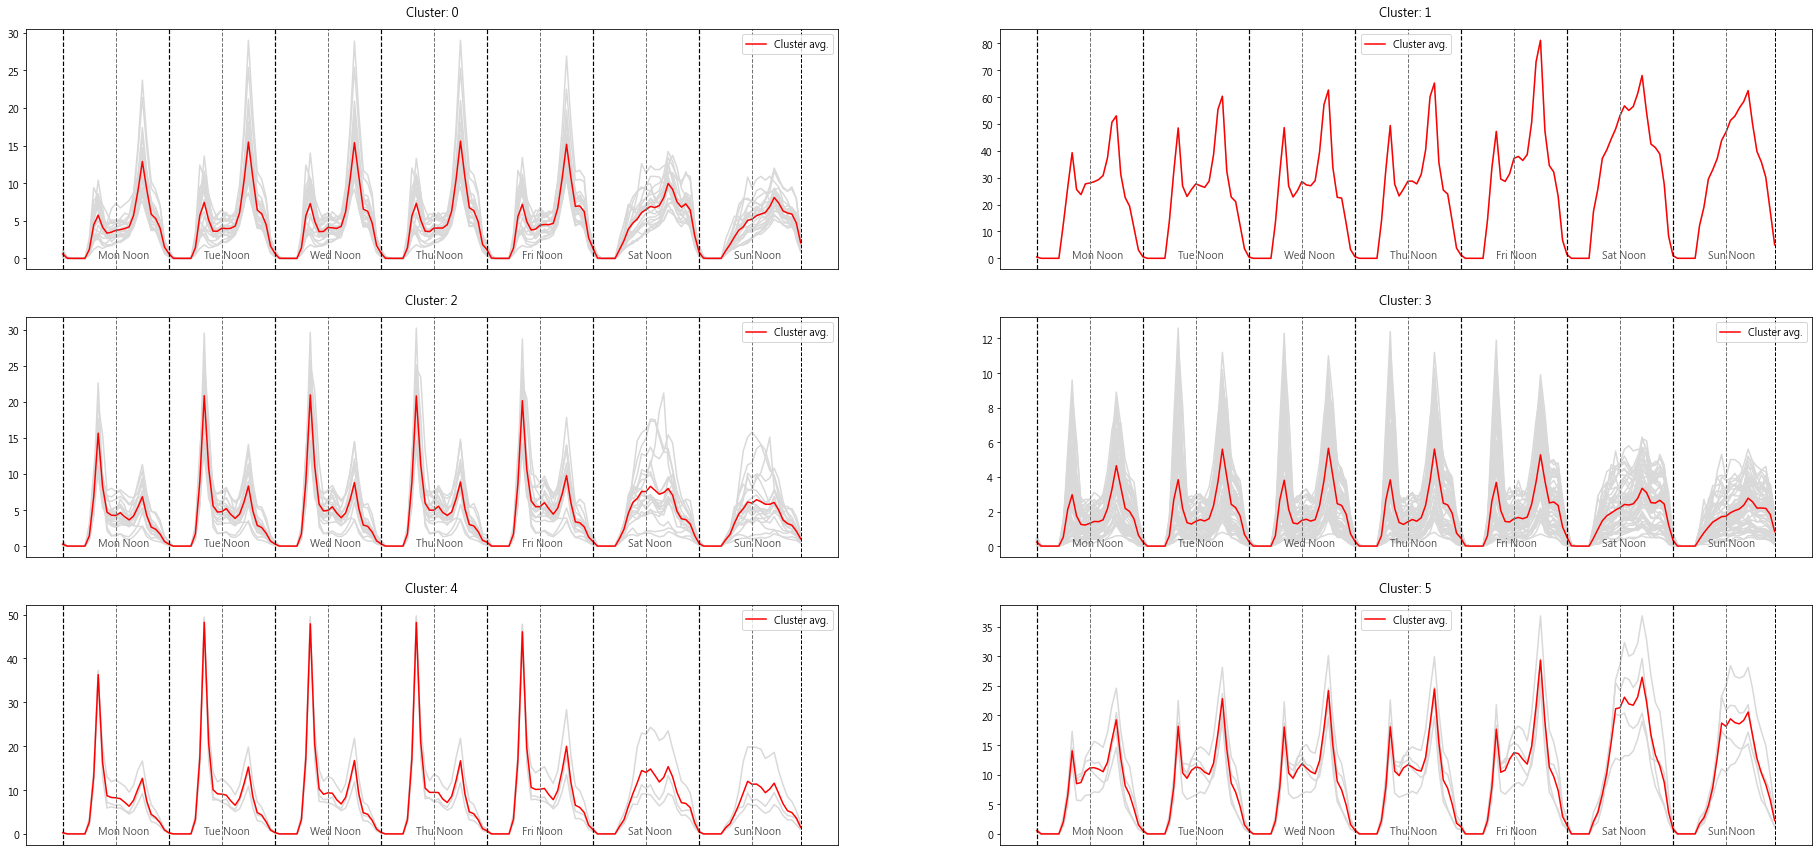

In [125]:
cluster_mean = cluster_mean_dict(df_cluster_grouped_re)
line_graph(line_group_dict, cluster_mean, 'r')

* 紅色線是每個Cluster內，站點的人流平均變化，概括了整個Cluster內車站的平均流量模式，代表該類型車站的整體特徵。

* 灰色是該Cluster全部站點，展示了該Cluster內每個車站每小時的流量變化趨勢。

如何解讀

如果灰色線條非常集中，且緊跟紅色線條，則說明分群的劃分效果較好，該Cluster內的車站數據模式相似。


# 各分群分析

1.   Cluster 0
*   車站：G大坪林, 公館, 頂溪, 永安市場, O景安, 南勢角, 圓山, 劍潭, 士林, 芝山, 石牌, 淡水, 海山, 亞東醫院, 府中, 新埔, 江子翠, 龍山寺, 永春, 南港, 松山
*   特徵：數值週期性波動顯著，尤其是在週一到週五的白天 (Noon) 時段有尖峰，週末趨於平緩。
*   解釋：可能代表 **工作日交通流量明顯增加的站點**，週末人流量較低且波動較小。

2.   Cluster 1
*   車站：台北車站
*   特徵：數值波動幅度大且尖峰明顯分散在一周**各時間段**，週五和週六晚間顯示更高的數值。
*   解釋：可能代表商業或娛樂活動密集 的站點，例如週末晚間活動增加。

3.   Cluster 2
*   車站：大安, 西湖, 港墘, 南港展覽館, 古亭, 中正紀念堂, 台大醫院, 雙連, 民權西路, 善導寺, 忠孝新生, 忠孝敦化, 國父紀念館, 台北101/世貿, 信義安和, 台北小巨蛋, 南京三民, 行天宮, 東門
*   特徵：週期性波動明顯，數值波峰出現在週一到週五的白天 (Noon)，週末數值趨於平緩且波峰較低。
*   解釋：與 Cluster 0 類似，可能代表**工作日通勤為主的站點**，但整體數值更低。

4.   Cluster 3
*   車站：松山機場, 中山國中, 科技大樓, 六張犁, 麟光, 辛亥, 萬芳醫院, 萬芳社區, 木柵, 動物園, 大直, 劍南路, 文德, 內湖, 大湖公園, 葫洲, 東湖, 南港軟體園區, 小碧潭, 新店, 新店區公所, 七張, 景美, 萬隆, 台電大樓, 小南門, 明德, 唭哩岸, 奇岩, 北投, 新北投, 復興崗, 忠義, 關渡, 竹圍, 紅樹林, 頂埔, 永寧, 土城, 後山埤, 昆陽, 象山, 大安森林公園, 北門, 輔大, 新莊, O頭前庄, 先嗇宮, 三重, 菜寮, 台北橋, 大橋頭站, 中山國小, 蘆洲, 三民高中, 徐匯中學, 三和國中, 三重國小, 迴龍, 丹鳳
*   特徵：數值波動頻繁但幅度較小，整體平緩，週末數值有所增加。
*   解釋：可能代表活動較少且穩定的站點，例如**住宅區或偏遠站點**。

5.   Cluster 4
*   車站：南京復興, 市政府, 松江南京
*   特徵：數值波動幅度較大，**週一到週五的白天 (Noon) 峰值非常高**，週末數值明顯下降。
*   解釋：可能代表高峰期特別明顯的站點，如**商務區或辦公中心**，平日通勤流量大。


6.   Cluster 5
*   車站：忠孝復興, 中山, BL板橋, 西門
*   特徵：數值波動呈現明顯的**雙峰結構**，週一到週五白天和晚上都有顯著峰值，週末也存在活動增加。
*   解釋：可能代表 多元活動站點，如結合商務和娛樂功能的地區，**活動時間更廣泛**。

# 總結
*   Cluster 0 和 Cluster 2：主要代表通勤需求高的站點，波動集中在工作日白天。
*   Cluster 1 和 Cluster 5：週末活動顯著，代表娛樂或商業活動集中的站點。
*   Cluster 3：整體活動較低，代表穩定或低需求的站點。
*   Cluster 4：高峰期流量顯著，通常是商務或高流量的工作站點。